In [1]:
import pandas as pd

housing = pd.read_csv('zestawy danych/mieszkania_poland/Houses.csv', encoding='latin-1', index_col=0)
housing = housing[housing['sq'] < 500]
housing = housing[housing['price'] < 3000000]
housing = housing[housing['year'] <= 2023]
housing = housing[housing['year'] >= 1500]
housing = housing[housing['longitude'] >= 16.85]
housing = housing[housing['longitude'] <= 21.25]
housing = housing[housing['latitude'] <= 52.47]
housing = housing.drop('id',axis=1)

housing.head()

address      city  floor  \
0           Podgórze Zab³ocie Stanis³awa Klimeckiego    Kraków    2.0   
1                          Praga-Po³udnie Grochowska  Warszawa    3.0   
2                            Krowodrza Czarnowiejska    Kraków    2.0   
3                                           Grunwald    Poznañ    2.0   
4  Ochota Gotowy budynek. Stan deweloperski. Osta...  Warszawa    1.0   

    latitude  longitude      price  rooms      sq    year  
0  50.049224  19.970379   749000.0    3.0   74.05  2021.0  
1  52.249775  21.106886   240548.0    1.0   24.38  2021.0  
2  50.066964  19.920025   427000.0    2.0   37.00  1970.0  
3  52.404212  16.882542  1290000.0    5.0  166.00  1935.0  
4  52.212225  20.972630   996000.0    5.0  105.00  2020.0

In [2]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23310 entries, 0 to 23763
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   address    23310 non-null  object 
 1   city       23310 non-null  object 
 2   floor      23310 non-null  float64
 3   latitude   23310 non-null  float64
 4   longitude  23310 non-null  float64
 5   price      23310 non-null  float64
 6   rooms      23310 non-null  float64
 7   sq         23310 non-null  float64
 8   year       23310 non-null  float64
dtypes: float64(7), object(2)
memory usage: 1.8+ MB


In [3]:
housing['address'].value_counts()

address
Mokotów                                                422
Wola                                                   381
Nowe Miasto Malta ul. Katowicka                        377
ródmiecie                                            326
Bia³o³êka                                              248
                                                      ... 
Wola Muranów wiêtojerska                                1
Praga-Pó³noc Nowa Praga ul. Jana M³ota 5                 1
Wilda ul. Sportowa                                       1
Grzegórzki al. p³k. W³adys³awa Beliny-Pra¿mowskiego      1
Bemowo ul. Antoniego Kocjana                             1
Name: count, Length: 5322, dtype: int64

In [4]:
summary = housing.describe()
summary.round(0)

floor  latitude  longitude      price    rooms       sq     year
count  23310.0   23310.0    23310.0    23310.0  23310.0  23310.0  23310.0
mean       3.0      51.0       20.0   619566.0      3.0     59.0   2001.0
std        2.0       1.0        1.0   357668.0      1.0     26.0     30.0
min        0.0      50.0       17.0     5000.0      1.0      9.0   1535.0
25%        1.0      50.0       20.0   411473.0      2.0     42.0   1985.0
50%        2.0      52.0       20.0   520000.0      3.0     54.0   2019.0
75%        4.0      52.0       21.0   698124.0      3.0     68.0   2021.0
max       10.0      52.0       21.0  2995333.0     10.0    380.0   2023.0

In [5]:
import plotly.express as px

fig = px.scatter_mapbox(housing, lat='latitude', lon='longitude', hover_data=['price', 'sq'], zoom=3)


fig.update_layout(mapbox_style='carto-positron',
                    margin={'r': 10, 't': 10, 'l': 10, 'b': 10})
fig.show()

In [6]:
housing_max_price = housing['price'].idxmax()

In [7]:
address_with_max_price = housing.loc[housing_max_price, 'address']

In [8]:
print(address_with_max_price)

Mokotów


In [9]:
housing_max_sq = housing['sq'].idxmax()
address_with_max_sq = housing.loc[housing_max_sq, 'city']
address_with_max_sq

'Poznañ'

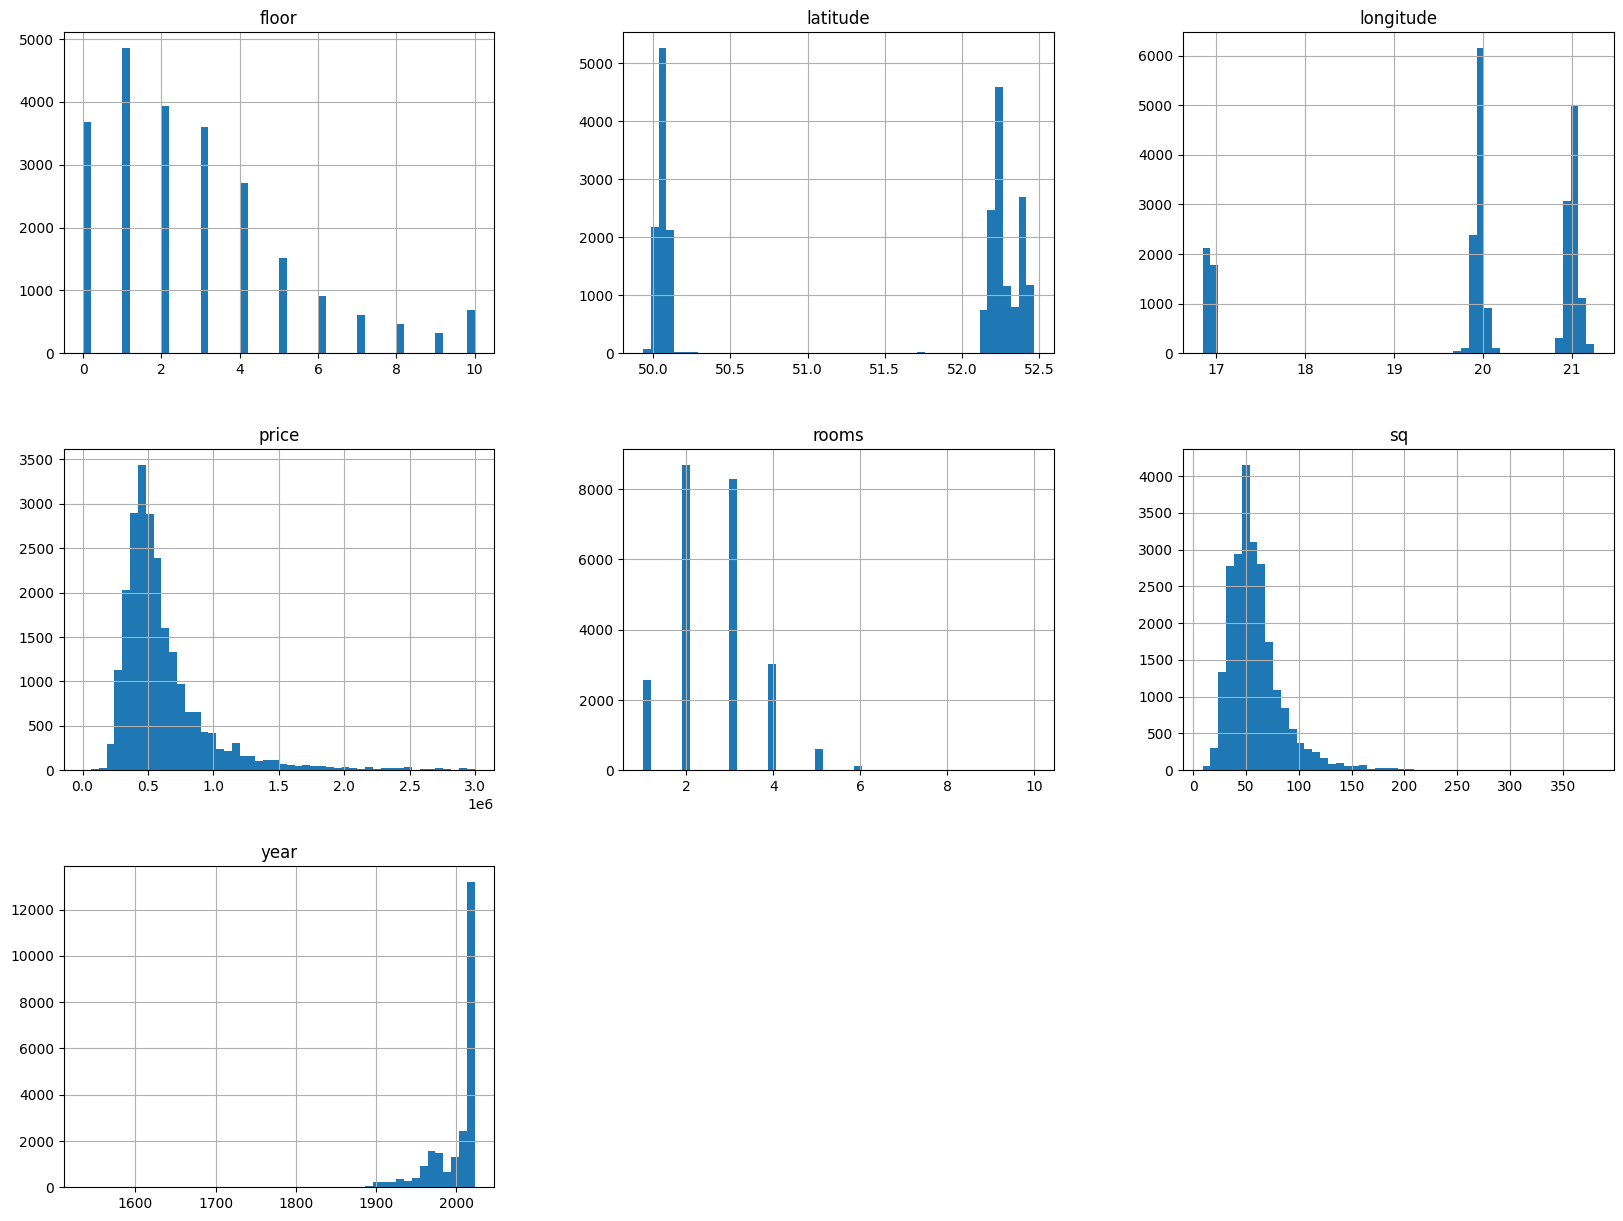

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20, 15))
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

<Axes: xlabel='longitude', ylabel='latitude'>

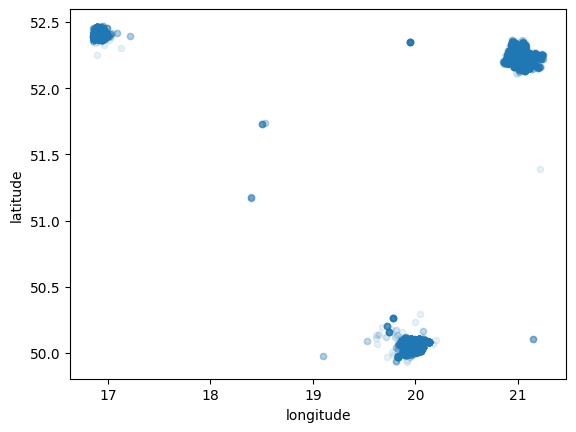

In [12]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

array([[<Axes: xlabel='price', ylabel='price'>,
        <Axes: xlabel='sq', ylabel='price'>,
        <Axes: xlabel='rooms', ylabel='price'>,
        <Axes: xlabel='year', ylabel='price'>],
       [<Axes: xlabel='price', ylabel='sq'>,
        <Axes: xlabel='sq', ylabel='sq'>,
        <Axes: xlabel='rooms', ylabel='sq'>,
        <Axes: xlabel='year', ylabel='sq'>],
       [<Axes: xlabel='price', ylabel='rooms'>,
        <Axes: xlabel='sq', ylabel='rooms'>,
        <Axes: xlabel='rooms', ylabel='rooms'>,
        <Axes: xlabel='year', ylabel='rooms'>],
       [<Axes: xlabel='price', ylabel='year'>,
        <Axes: xlabel='sq', ylabel='year'>,
        <Axes: xlabel='rooms', ylabel='year'>,
        <Axes: xlabel='year', ylabel='year'>]], dtype=object)

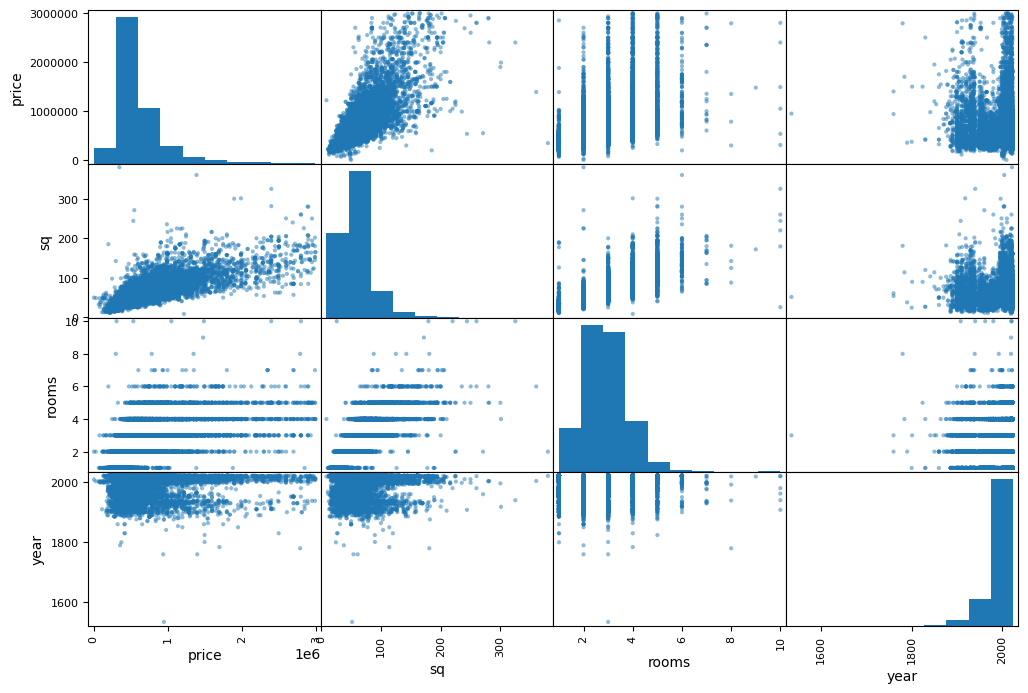

In [13]:
from pandas.plotting import scatter_matrix

attributes = ['price', 'sq', 'rooms', 'year']

scatter_matrix(housing[attributes], figsize=(12, 8))

In [14]:
import numpy as np

housing['avg_room_size'] = housing['sq'] / housing['rooms']

numeric_columns = housing.select_dtypes(include=np.number)
correlation_matrix = numeric_columns.corr()
correlation_matrix['price'].sort_values(ascending=False)

price            1.000000
sq               0.761835
rooms            0.529185
avg_room_size    0.325904
longitude        0.235599
floor            0.088063
latitude         0.069148
year            -0.049945
Name: price, dtype: float64

In [15]:
housing = train_set.copy()

housing_labels = train_set['price'].copy()
housing = train_set.drop('price', axis=1)
housing_without = housing.drop('address', axis=1)

In [16]:
housing_without_cat = housing_without[['city']]
housing_without_cat.head()

city
7922   Warszawa
11060  Warszawa
10626  Warszawa
3702     Kraków
653      Kraków

In [17]:
from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder()

housing_without_cat_encoded = one_hot.fit_transform(housing_without_cat)
housing_without_cat_encoded.toarray()

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [18]:
one_hot.categories_

[array(['Kraków', 'Poznañ', 'Warszawa'], dtype=object)]

In [19]:
from sklearn.base import BaseEstimator, TransformerMixin

housing_num = housing_without.drop("city", axis=1)
sq_ix = housing_num.columns.get_loc("sq")
rooms_ix = housing_num.columns.get_loc("rooms")

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, avg_m_squared = True):
        self.avg_m_squared = avg_m_squared
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        if self.avg_m_squared:
            avg_room_size = X.iloc[:, sq_ix] / X.iloc[:, rooms_ix]
            return np.c_[X, avg_room_size]

In [20]:
housing_num.head()

floor   latitude  longitude  rooms      sq    year
7922     1.0  52.232810  21.019067    2.0   58.00  1913.0
11060    6.0  52.193987  21.045781    4.0  157.67  2020.0
10626    8.0  52.227478  20.999383    4.0  121.50  1999.0
3702     2.0  50.058444  19.970235    1.0   33.91  2021.0
653      0.0  50.097426  20.009603    2.0   48.33  2020.0

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [22]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['city']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing_without)

In [23]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [24]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Prognozy: ", lin_reg.predict(some_data_prepared))

Prognozy:  [ 727411.6186869  1855178.36488915 1433468.36560992  366784.33716303
  474331.75318621]


In [25]:
print("Etykiety: ", list(some_labels))

Etykiety:  [898000.0, 2200000.0, 1190000.0, 474740.0, 434970.0]


In [26]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)

lin_rmse = np.sqrt(lin_mse)
lin_rmse

210475.1956105762

In [27]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [28]:
housing_predictions = tree_reg.predict(housing_prepared)

tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

5145.27309702989

In [29]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [30]:
def display_scores(scores):
    print("Wyniki: ", scores)
    print("Średnia: ", scores.mean())
    print("Odchylenie standardowe: ", scores.std())
display_scores(tree_rmse_scores)

Wyniki:  [176610.30242596 181210.35447581 181802.24317174 183913.27572913
 151365.73013181 172409.35458542 185086.04447994 181035.67880746
 191383.40500886 203434.52942899]
Średnia:  180825.09182451127
Odchylenie standardowe:  12680.488621052362


In [31]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

housing_predictions = forest_reg.predict(housing_prepared)

forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(tree_mse)
print(forest_rmse)

5145.27309702989


In [32]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

display_scores(forest_rmse_scores)

Wyniki:  [133722.42956639 127991.85131185 133987.6598454  121990.6474654
 127739.88559713 123158.86006195 136283.47512827 133218.58637209
 136046.96345003 143519.31769795]
Średnia:  131765.96764964578
Odchylenie standardowe:  6227.698398066505


In [35]:
from sklearn.svm import SVR

SVR_model = SVR(kernel="rbf", C=1.0, gamma=0.1)
SVR_model.fit(housing_prepared, housing_labels)

predictions = SVR_model.predict(housing_prepared)

SVR_mse = mean_squared_error(housing_labels, predictions)
SVR_rmse = np.sqrt(SVR_mse)
SVR_rmse

369872.7018806423

In [37]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}

forest_reg = RandomForestRegressor()

search = RandomizedSearchCV(forest_reg, param_grid, scoring='neg_mean_squared_error', n_iter=10, cv=5, random_state=42)
search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [None, 5, 10, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='neg_mean_squared_error')

In [38]:
search.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 20}

In [39]:
search.best_estimator_

RandomForestRegressor(max_depth=20, n_estimators=300)

In [40]:
feature_importances = search.best_estimator_.feature_importances_
feature_importances

array([2.48407099e-02, 1.01016165e-01, 1.22846036e-01, 4.06871885e-03,
       6.38593015e-01, 5.76266936e-02, 5.02345204e-02, 3.36084738e-04,
       1.35225627e-04, 3.02830086e-04])

In [41]:
cvres = search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

148813.80981081125 {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 10}
136247.35430402975 {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}
135876.86026332935 {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}
135249.30110654666 {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}
148648.02891691378 {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10}
147594.79363653628 {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 10}
185950.73603632252 {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 5}
186141.92106653712 {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 5}
136686.8159160548 {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 20}
136534.64432241433 {'n_estimators': 300, 'min_samples

In [42]:
extra_attribs = ['avg_room_size']
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.638593015205432, 'sq'),
 (0.12284603630331901, 'longitude'),
 (0.10101616523048598, 'latitude'),
 (0.05762669363776322, 'year'),
 (0.050234520394843836, 'avg_room_size'),
 (0.024840709923367156, 'floor'),
 (0.004068718854129901, 'rooms'),
 (0.00033608473757291984, 'Kraków'),
 (0.0003028300863488931, 'Warszawa'),
 (0.00013522562673715685, 'Poznañ')]

In [44]:
final_model = search.best_estimator_

X_test = test_set.drop("price", axis=1)
y_test = test_set['price'].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

128688.56302517366

<Figure size 1600x800 with 0 Axes>

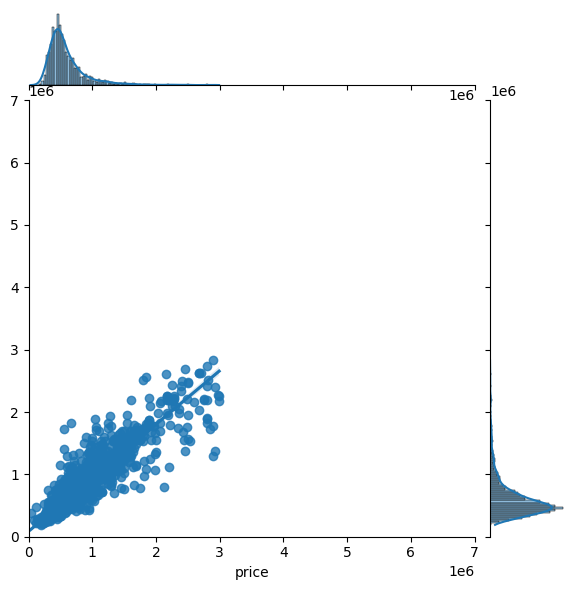

In [46]:
import seaborn as sns

plt.figure(figsize=(16,8))
sns.jointplot(x=y_test, y=final_predictions, kind="reg")
plt.xlim(0, 7000000)
plt.ylim(0, 7000000)
plt.show()